In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np


In [2]:
# Logistic Regression
# Khai bao thu vien
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Lay du lieu
data = pd.read_csv('train_PTIT.csv')
data

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Genetic_Algorithms
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Theory
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks


<Axes: >

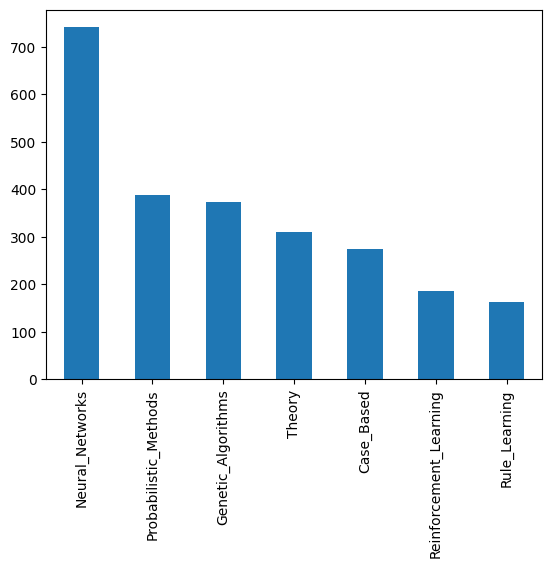

In [4]:
# visualizing data
df = data.copy()
df["subject"].value_counts().plot(kind="bar")

In [5]:
df['subject'].unique()
name_2_Id = {
    "Probabilistic_Methods": 0,
    "Neural_Networks": 1,
    "Genetic_Algorithms": 2,
    "Rule_Learning": 3,
    "Reinforcement_Learning": 4,
    "Case_Based": 5,
    "Theory": 6,
}

id_2_Name = {
    "0": "Probabilistic_Methods",
    "1": "Neural_Networks",
    "2": "Genetic_Algorithms",
    "3": "Rule_Learning",
    "4": "Reinforcement_Learning",
    "5": "Case_Based",
    "6": "Theory",
}
# preprocessing subject
df["subject"] = df["subject"].map(name_2_Id)
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Chia du lieu thanh 2 tap: tap huan luyen va tap kiem tra
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.1, random_state=0)
# test_size = 0.2 chi dinh ty le cua tap kiem tra voi du lieu ban dau(20%)
# random_state co the lay gia tri bat ki

In [7]:
# Khoi tao doi tuong lR va huan luyen mo hinh
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
# Kiem tra do chinh xac cua mo hinh
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7786885245901639
0.7786885245901639


In [9]:
# KNN
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.48770491803278687
KNN f1 score:  0.4803475882934286
KNN confusion matrix: 
[[20  7  5  0  1  1  2]
 [15 36 12  0  3  3  6]
 [ 4  6 33  0  0  1  1]
 [ 2  1  3  5  0  3  1]
 [ 1  8  4  0  5  1  1]
 [ 7  3  2  1  1  9  1]
 [ 5  8  3  0  2  0 11]]


In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance', metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.75
KNN f1 score:  0.7477503632567037
KNN confusion matrix: 
[[30  1  1  0  0  1  3]
 [ 5 57  3  2  2  3  3]
 [ 0  2 41  0  1  0  1]
 [ 1  1  1  9  0  2  1]
 [ 0  6  2  0 12  0  0]
 [ 1  1  1  2  0 17  2]
 [ 5  3  0  2  2  0 17]]


In [12]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

SVM accuracy:  0.7418032786885246
SVM f1 score:  0.743460509690018
SVM confusion matrix: 
[[29  4  0  0  0  0  3]
 [13 55  2  1  1  1  2]
 [ 2  3 38  0  1  1  0]
 [ 2  1  0  8  0  3  1]
 [ 0  4  0  0 15  1  0]
 [ 0  1  0  2  0 19  2]
 [ 3  7  0  1  0  1 17]]


In [13]:
# Random forest
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [15]:
clf = RandomForestClassifier(n_estimators=150, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("RF accuracy: ", accuracy_score(y_test, y_pred))
print("RF f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

RF accuracy:  0.7704918032786885
RF f1 score:  0.7712723671291811
RF confusion matrix: 
[[30  5  0  0  0  0  1]
 [ 7 61  1  0  1  1  4]
 [ 0  5 37  0  1  2  0]
 [ 0  1  0  9  0  2  3]
 [ 0  6  1  0 12  0  1]
 [ 0  1  0  0  0 19  4]
 [ 2  4  0  1  1  1 20]]
